In [1]:
using LinearSystems
using VSTom
using PyPlot

In [2]:
dist_name = "blob"

test_dists = read_ncdf("data/test_distributions.cdf");
data = read_ncdf("data/augd_test_data.cdf");
wf   = read_ncdf("data/augd_transfer_matrix.cdf");

dist_full = test_dists[dist_name]
A_full = wf["transfer_matrix"]
energy_full = wf["energy"]
pitch_full  = wf["pitch"]

nenergy=15
npitch=20
A0,energy,pitch = resize_transfer_matrix(A_full,energy_full,pitch_full,nenergy,npitch);
dist = bilinear(dist_full,energy_full,pitch_full,energy,pitch);
dE = abs(energy[2]-energy[1])
dP = abs(pitch[2]-pitch[1]);

spec = data[dist_name*"_spec"]
err  = data[dist_name*"_err"];

In [12]:
A, b = scale_by_error(A0,spec[:,18],err[:,18])
nr,nc = size(A);

#Truncated Singular Value Decomposistion

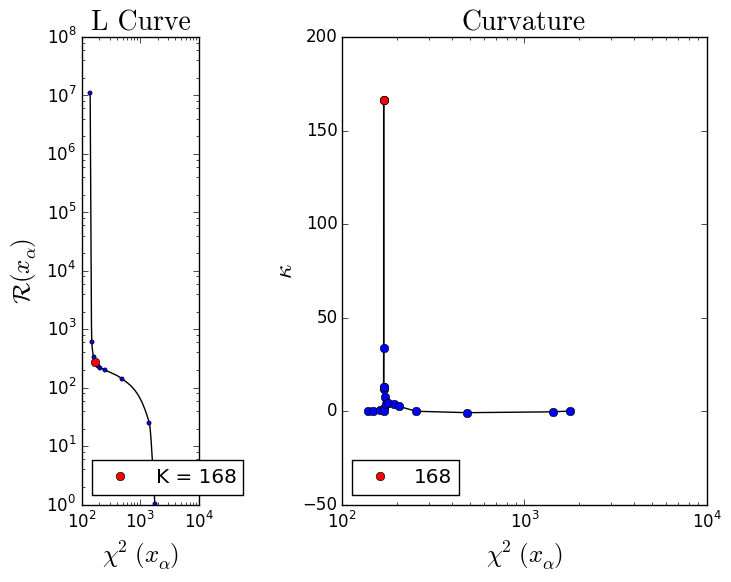

168

In [32]:
TSVD = TSVDFunctional(A,b)
k = discrete_lcurve(TSVD,1:230;doplot=true)

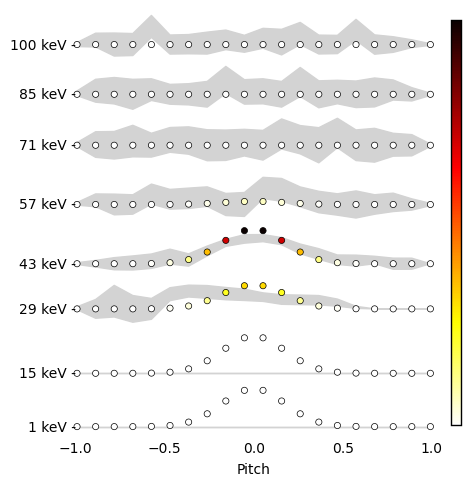

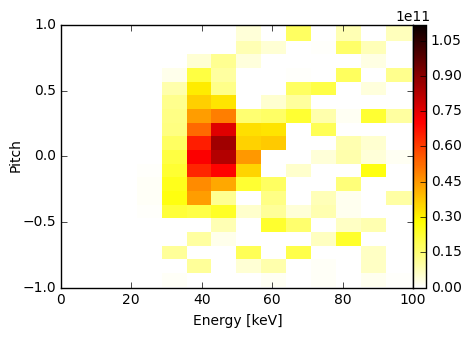

PyError: PyError (:PyObject_Call) <class 'AttributeError'>
AttributeError("'YTick' object has no attribute 'axes'",)
  File "/home/lstagner/anaconda3/lib/python3.4/site-packages/matplotlib/backend_bases.py", line 2158, in print_figure
    **kwargs)
  File "/home/lstagner/anaconda3/lib/python3.4/site-packages/matplotlib/backends/backend_agg.py", line 521, in print_png
    FigureCanvasAgg.draw(self)
  File "/home/lstagner/anaconda3/lib/python3.4/site-packages/matplotlib/backends/backend_agg.py", line 469, in draw
    self.figure.draw(self.renderer)
  File "/home/lstagner/anaconda3/lib/python3.4/site-packages/matplotlib/artist.py", line 59, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/home/lstagner/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py", line 1085, in draw
    func(*args)
  File "/home/lstagner/anaconda3/lib/python3.4/site-packages/matplotlib/artist.py", line 59, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/home/lstagner/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py", line 2110, in draw
    a.draw(renderer)
  File "/home/lstagner/anaconda3/lib/python3.4/site-packages/matplotlib/artist.py", line 59, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/home/lstagner/anaconda3/lib/python3.4/site-packages/matplotlib/axis.py", line 1114, in draw
    ticks_to_draw = self._update_ticks(renderer)
  File "/home/lstagner/anaconda3/lib/python3.4/site-packages/matplotlib/axis.py", line 1047, in _update_ticks
    tick.update_position(loc)
  File "/home/lstagner/anaconda3/lib/python3.4/site-packages/matplotlib/axis.py", line 579, in update_position
    nonlinear = (hasattr(self.axes, 'yaxis') and


In [31]:
sol = minimize(TSVD,k)
x = max(reshape(sol.x,npitch,nenergy)./(dE*dP),0)
err = reshape(sol.sigma,npitch,nenergy)./(dE*dP)
make_plots(energy,pitch,x,err,dist)

#Zeroth Order Tikhonov

In [7]:
L1E,L1p = gradEP(energy,pitch)
T1 = TikhonovFunctional(A,b,(eye(nc),))
T2 = TikhonovFunctional(A,b,(L1E,L1p));

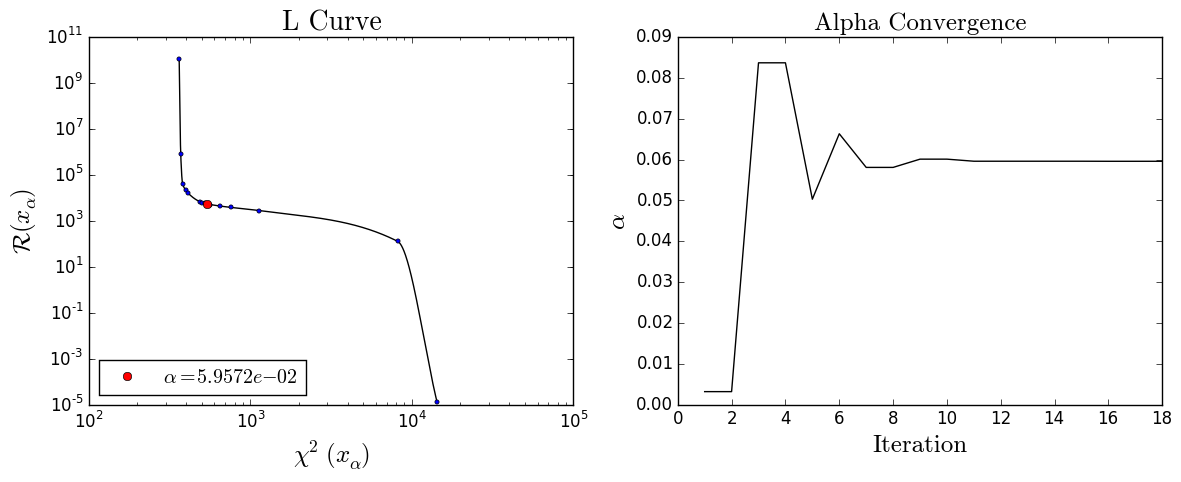

0.059571776429972245

In [8]:
alpha = lcurve(T1;log_alpha_range=(-10,5),doplot=true)

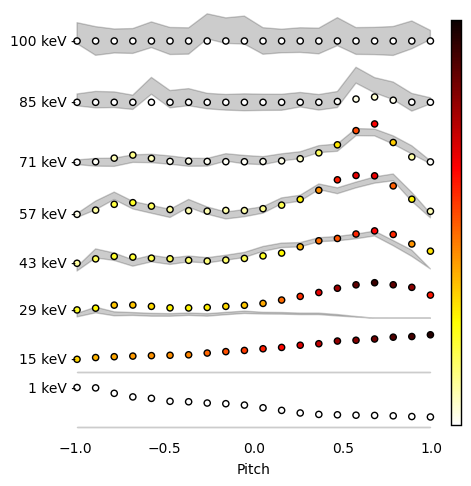

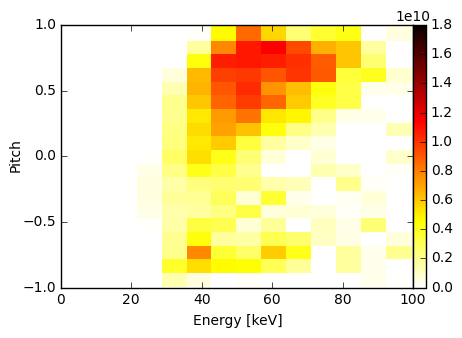

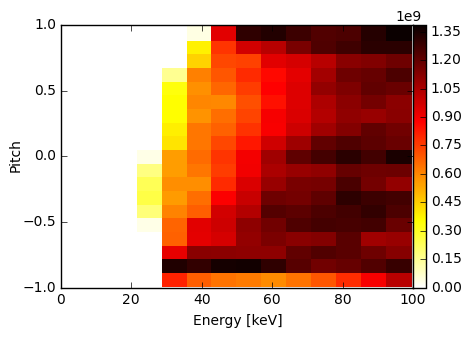

In [9]:
sol = minimize(T1,alpha)
x = max(reshape(sol.x,npitch,nenergy)./(dE*dP),0)
err = reshape(sol.sigma,npitch,nenergy)./(dE*dP)
make_plots(energy,pitch,x,err,dist)

#First Order Tikhonov

In [ ]:
alpha = lcurve(T2;log_alpha_range=(0,20),nseeds=20,doplot=true);

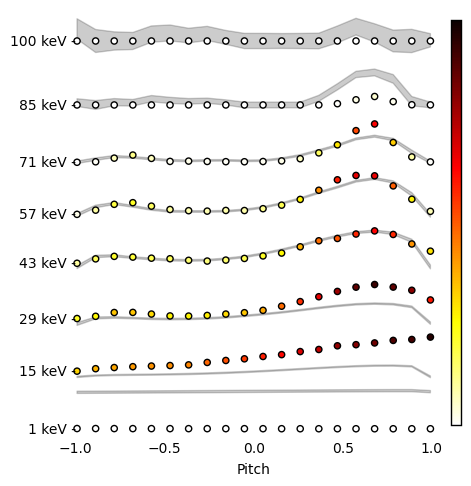

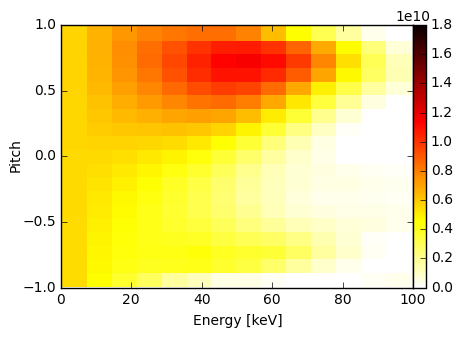

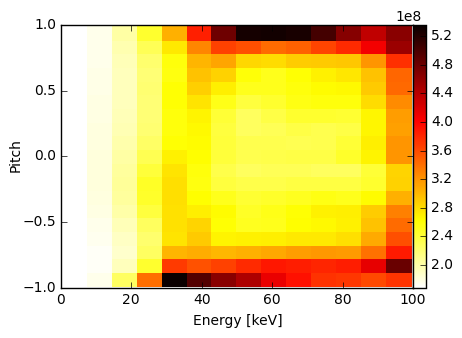

In [11]:
sol = minimize(T2,alpha)
x = max(reshape(sol.x,npitch,nenergy)./(dE*dP),0)
err = reshape(sol.sigma,npitch,nenergy)./(dE*dP)
plot_dist(energy,pitch,x,err,dist)

#Minimum Fisher

In [ ]:
MF = FisherFunctional(A,b,(L1E,L1p));
alpha = lcurve(MF;log_alpha_range=(0,20),doplot=true,kwargs={:wmax=>1,:tol=>1e-2},nseeds=20);

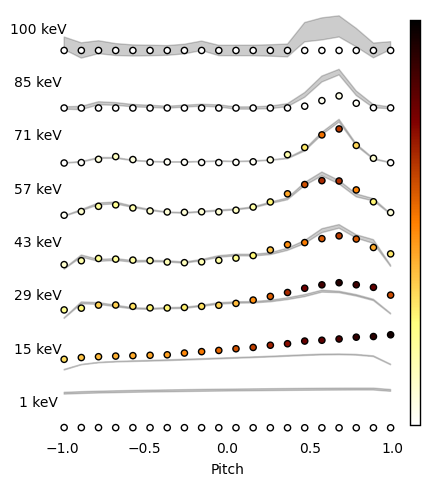

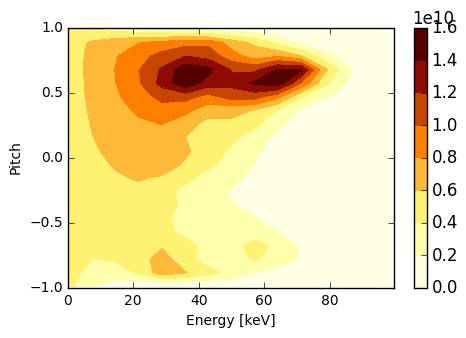

In [11]:
sol = minimize(MF,alpha)
x = max(reshape(sol.x,npitch,nenergy)./(dE*dP),0)
err = reshape(sol.sigma,npitch,nenergy)./(dE*dP)
plot_dist(energy,pitch,x,err,dist)

#Maximum Entropy

In [13]:
ME = EntropyFunctional(A,b);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************



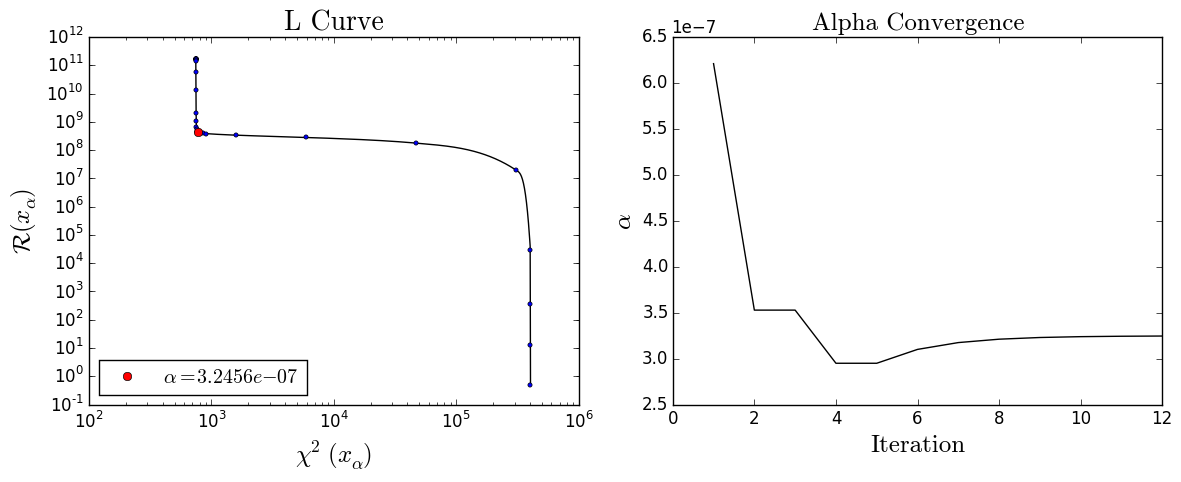

In [14]:
alpha = lcurve(ME;log_alpha_range=(-20,0),doplot=true,nseeds=30);

In [ ]:
sol = minimize(ME,alpha)
x = reshape(sol.x,npitch,nenergy)./(dE*dP)
err = reshape(sol.sigma,npitch,nenergy)./(dE*dP)
plot_dist(energy,pitch,x,err,dist)

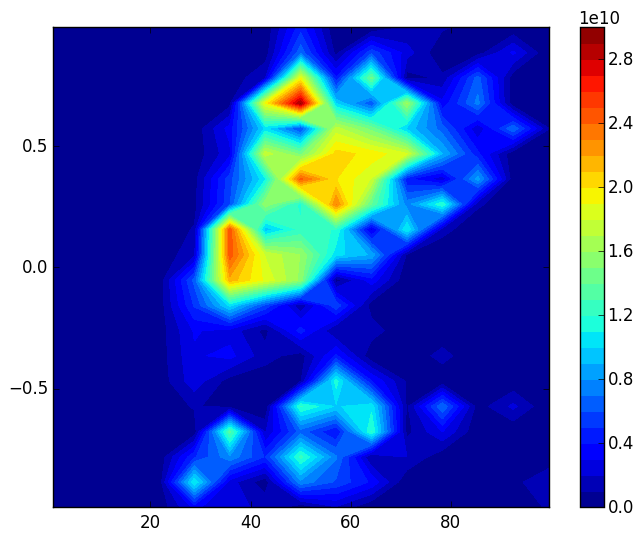

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd1200862b0>

In [29]:
contourf(energy,pitch,err,30)
colorbar()

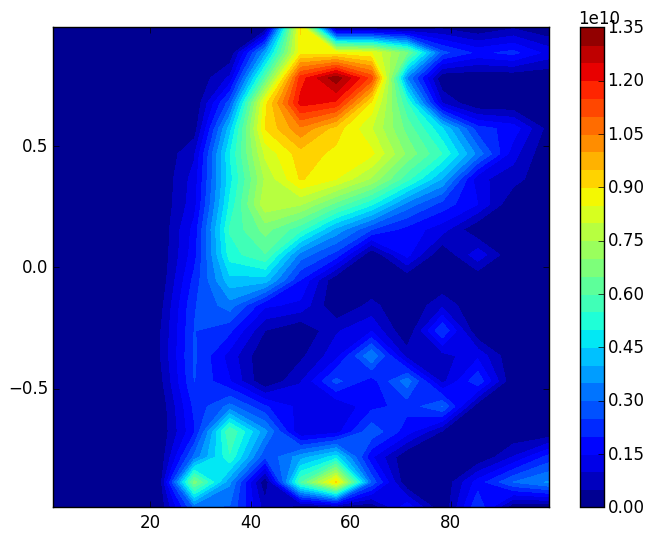

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd11ff89f60>

In [32]:
contourf(energy,pitch,x,30)
colorbar()